In [1]:
import libs.utils
import libs.vars
import xarray

In [2]:
ensemble = libs.vars.ensemble()

base_path = '_data/cmip6'
ukesm_file = f'/UKESM1-0-LL/siconc/siconc_SImon_UKESM1-0-LL_ssp585_r2i1p1f2_gn_201501-204912.nc'
ukesm_path = f'{base_path}{ukesm_file}'
ukesm_grid = xarray.open_mfdataset(
    paths=ukesm_path, 
    combine='by_coords',
    use_cftime=True
)
regrid_kwargs = {
    'grid': ukesm_grid,
    'method': 'nearest_s2d',
    'copy_dims': ['i', 'j', 'longitude', 'latitude', 'vertices']
}

areacello_kwargs = {
    'experiment_id': 'piControl',
    'variable_id': 'areacello',
    'variant_label': None
}

variables = [
    'siconc',
    'sithick',
    'sisnthick',
    'pr',
    'prsn'
]

si_kwargs = {
    'experiment_id': 'ssp585',
    'frequency': 'mon',
    'regrid_kwargs': regrid_kwargs,
    'variable_id': 'sisnthick'
}

In [3]:
for i, item in enumerate(ensemble):
    kwargs = {}
    kwargs['experiment_id'] = item['experiment_id']
    kwargs['source_id'] = item['source_id']
    kwargs['variant_label'] = item['variant_label']
    
    for k in si_kwargs:
        kwargs[k] = si_kwargs[k]

    #kwargs['force_write'] = True
    kwargs['process_files'] = True
    kwargs['save_to_local'] = True

    ensemble[i]['file'] = libs.utils.download_variable(**kwargs)
    print('-' * 20)

Requesting:
-> https://esgf-index1.ceda.ac.uk/esg-search/search/?experiment_id=ssp585&format=application%2Fsolr%2Bjson&grid_label=gn&latest=true&limit=20&mip_era=CMIP6&offset=0&replica=false&source_id=UKESM1-0-LL&type=Dataset&variable_id=sisnthick&frequency=mon&variant_label=r2i1p1f2
Results:
-> CMIP6.ScenarioMIP.MOHC.UKESM1-0-LL.ssp585.r2i1p1f2.SImon.sisnthick.gn.v20200420|esgf-data3.ceda.ac.uk
   -> Already exists, skipping: _data/cmip6/UKESM1-0-LL/sisnthick/sisnthick_SImon_UKESM1-0-LL_ssp585_r2i1p1f2_gn_201501-204912.nc
   -> Already exists, skipping: _data/cmip6/UKESM1-0-LL/sisnthick/sisnthick_SImon_UKESM1-0-LL_ssp585_r2i1p1f2_gn_205001-210012.nc
-> Processing:
   -> Merged
   -> Regridded
   -> Writing to _data/cmip6/UKESM1-0-LL/sisnthick/sisnthick_SImon_UKESM1-0-LL_ssp585_r2i1p1f2_gn_201501-210012_processed.nc
[########################################] | 100% Completed |  6.2s
   -> Saved to disk
   -> Compressed
--------------------
Requesting:
-> https://esgf-index1.ceda.ac.uk/

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


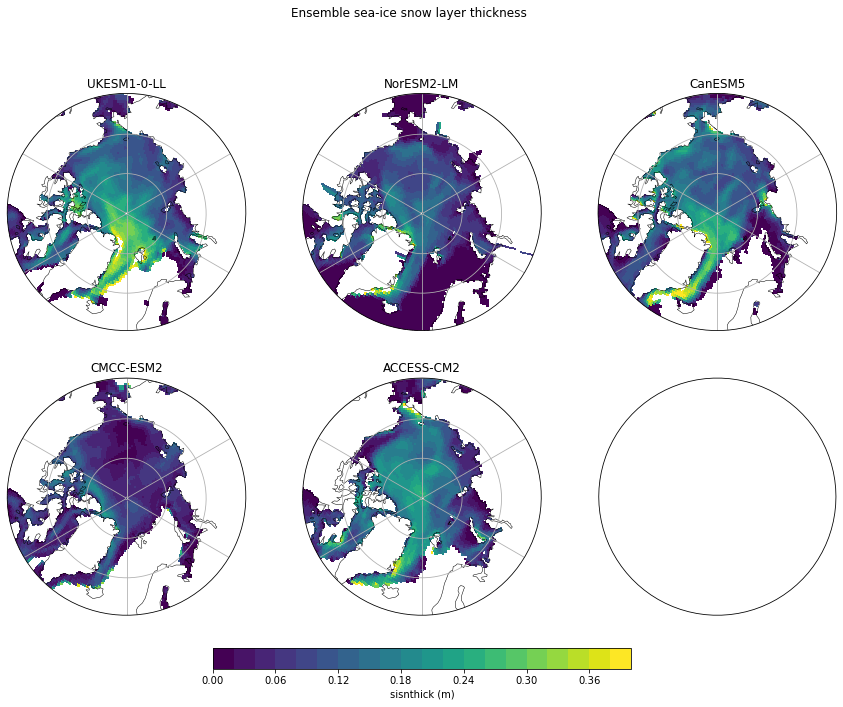

In [4]:
import libs.plot
import warnings
warnings.filterwarnings('ignore')

ensemble_data = []
for item in ensemble:
    item_data = xarray.open_mfdataset(
        paths=item['file'], 
        combine='by_coords',
        use_cftime=True
    )
    ensemble_data.append({
        'data': item_data.sisnthick[0, :, :],
        'label': item['source_id']
    })

libs.plot.nstereo(
    ensemble_data,
    title='Ensemble sea-ice snow layer thickness',
    colorbar_label='sisnthick (m)',
    colormesh_kwargs={
        'extend': 'neither',
        'levels': 21,
        'vmin': 0,
        'vmax': 0.4,
        'x': 'longitude', 
        'y': 'latitude'
    },
    shape=(2, 3)
)